In [1]:
# Katarzyna Stojek

# python 3.11.2
# numpy 1.24.2
# scipy 1.10.1
# matplotlib 3.7.1
# pywavelets 1.4.1

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import pywt
import matplotlib.colors as colors

Wstęp:

Celem ćwiczenia jest zapoznanie się z metodami analizy sygnału przy użyciu transformaty falkowej dyskretnej i wykorzysystanie w tym celu skalogramu. Aby tego dokonać przeanalizowane zostaną przeanalizowane dwa sygnały: jeden prostrzy - świergot (chirp), drugi rzeczywisty "rabarbar8k"

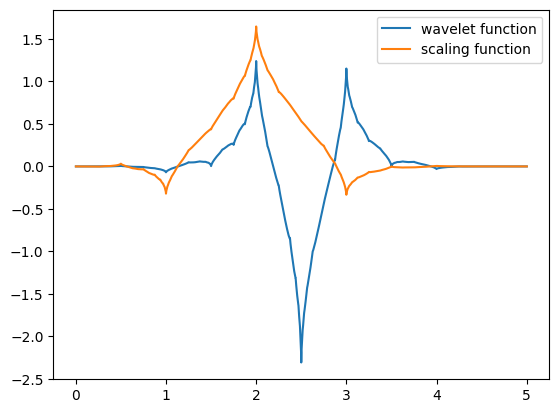

In [2]:
wavelet = pywt.Wavelet('coif1')
#falka coif 1

phi, psi, x = wavelet.wavefun(level=10)
plt.plot(x,psi,label='wavelet function')
plt.plot(x,phi,label='scaling function')
plt.legend()


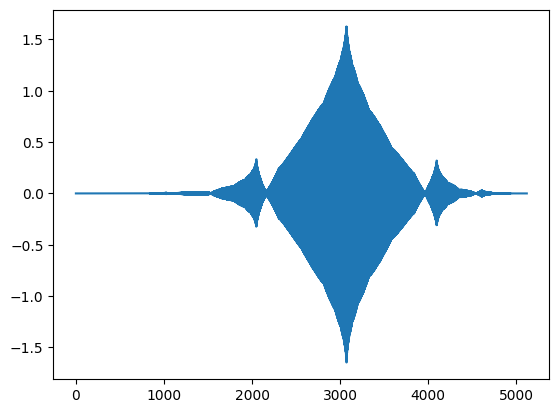

In [3]:
grr = pywt.qmf(phi)
# falka zwierciadlana
plt.plot(grr)

Text(0.5, 1.0, 'Sygnał: świergot liniowy')

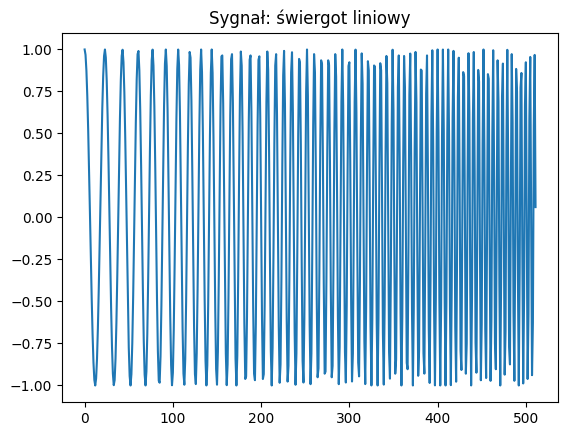

In [4]:
#nietrywialny sygnał - świergot
# Parametry generowanego sygnału
fs = 500 # częstotliwość próbkowania
N = 512 # liczba próbek 2^L
f1 = 20 # częstotliwość początkowa
f2 = 100 # częstotliwość końcowa
t = N/fs # czas trwania sygnału [s]
tn = np.arange(N)/fs # kolejne kroki czasowe

chirp = sig.chirp(tn, f1, t, f2, 'linear')

plt.plot(chirp)
plt.title("Sygnał: świergot liniowy")

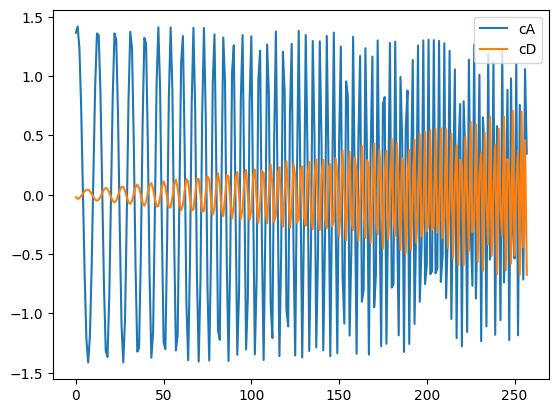

In [5]:
# jak wygląda pojedynczy krok
cA,cD = pywt.dwt(data=chirp,wavelet='coif1') #single level discrete wavelet transform
plt.plot(cA,label='cA') #approximation coeffs - niskoczęstotliwościowe składowe
plt.plot(cD,label='cD') #detailed coeffs - wysokoczęstotliwościowe składowe - jak widać rosną w czasie - sensowne dla sygnału jakim jest świergot
# https://slideplayer.pl/slide/9852167/
plt.legend()

6
[ 40.          44.44444444  50.          57.14285714  66.66666667
  80.         100.         133.33333333 200.         400.        ]


Text(0.5, 0, 'Lp.')

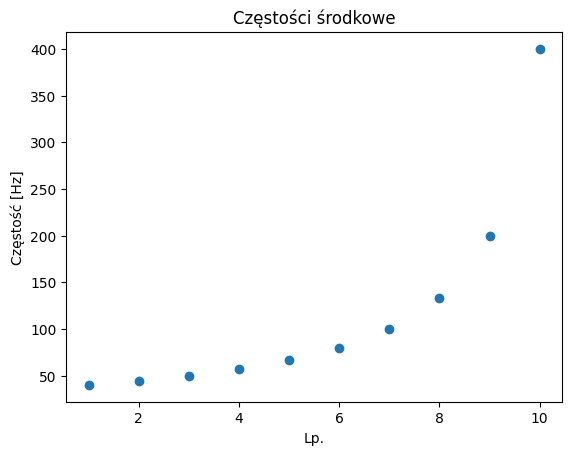

In [16]:
# Decymacja wielostopniowa

# maksymalna ilość operacji dla długości sygnału
level=int(np.log2(N))
# wykonanie transformaty falkowej
coefs = pywt.wavedec(chirp, 'coif1', mode='per',level=level)
# UserWarning: Level value of 9 is too high: all coefficients will experience boundary effects.
# Biblioteka do transformaty falkowej rekomenduje maksymalny level 6
print(pywt.dwt_max_level(len(chirp),'coif1'))

#Macierz do skalogramu
for indx in range(len(coefs)):
    coefs[indx] = np.pad(coefs[indx], (0, N//2-coefs[indx].size),'wrap')
coef_stack = np.vstack(coefs)

#Częstości centralne
central_f = pywt.scale2frequency('coif1',np.arange(1,level+2))*fs
# funkcja zwraca częstotliwości znormalizowane do częstotliwości próbkowania
central_f = central_f[::-1] # kolejność rosnąca
print(central_f)

plt.scatter(np.arange(1,11,1),central_f)
plt.title("Częstości środkowe")
plt.ylabel("Częstość [Hz]")
plt.xlabel("Lp.")

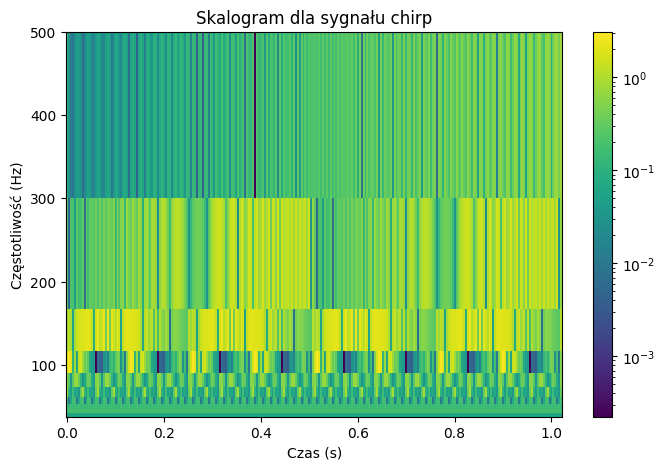

In [17]:
#skalogram
plt.figure(figsize=(8,5))
plt.pcolormesh(tn[::2], central_f, abs(coef_stack), shading='auto',norm=colors.LogNorm())
plt.xlabel('Czas (s)')
plt.ylabel('Częstotliwość (Hz)')
plt.title("Skalogram dla sygnału chirp")
plt.colorbar()

Wnioski sygnał chirp:

Im wyższa skala tym bardziej rozszerzona falka. Dla mniejszych skal obserwujemy zatem coraz drobniejsze, szybkozmienne detale. Większe skale odpowiadają natomiast za cechy wolnozmienne.

Możemy zobaczyć że dla największej częstotliwości obserwujemy w czasie dosyć monotoniczny wzrost amplitud. Dla mniejszych amplitud wartości wydają się zmienać okresowo.

15
13


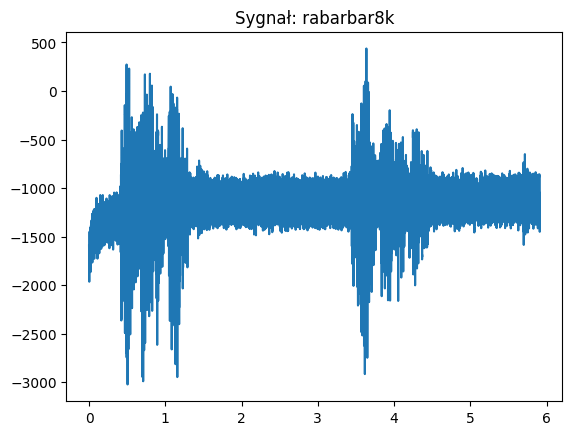

In [22]:
from scipy.io import wavfile
fs, signal = wavfile.read('rabarbar8k.wav')

N = len(signal)
t = N/fs # czas trwania sygnału [s]
tn = np.arange(N)/fs # kolejne kroki czasowe

plt.plot(tn,signal)
plt.title("Sygnał: rabarbar8k")

# maksymalna ilość operacji dla długości sygnału = 15
level=int(np.log2(len(signal)))
print(level)

# Biblioteka do transformaty falkowej rekomenduje maksymalny level 13
print(pywt.dwt_max_level(len(signal),'coif1'))

[ 400.          426.66666667  457.14285714  492.30769231  533.33333333
  581.81818182  640.          711.11111111  800.          914.28571429
 1066.66666667 1280.         1600.         2133.33333333 3200.
 6400.        ]


Text(0.5, 0, 'Lp.')

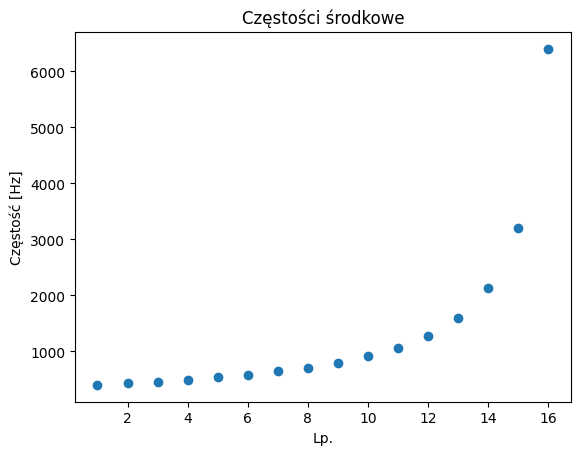

In [21]:
# wykonanie transformaty falkowej
coefs = pywt.wavedec(signal, 'coif1', mode='per',level=level)

#Macierz do skalogramu
for indx in range(len(coefs)):
    coefs[indx] = np.pad(coefs[indx], (0, N//2-coefs[indx].size),'wrap')
coef_stack = np.vstack(coefs)

#Częstości centralne
central_f = pywt.scale2frequency('coif1',np.arange(1,level+2))*fs
# funkcja zwraca częstotliwości znormalizowane do częstotliwości próbkowania
central_f = central_f[::-1] # kolejność rosnąca
print(central_f)

plt.scatter(np.arange(1,17,1),central_f)
plt.title("Częstości środkowe")
plt.ylabel("Częstość [Hz]")
plt.xlabel("Lp.")

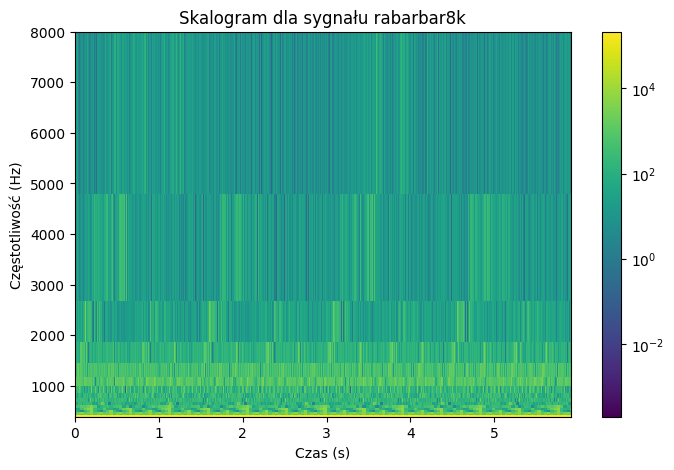

In [20]:
#skalogram
plt.figure(figsize=(8,5))
plt.pcolormesh(tn[::2], central_f, abs(coef_stack), shading='auto',norm=colors.LogNorm())
plt.xlabel('Czas (s)')
plt.ylabel('Częstotliwość (Hz)')
plt.title("Skalogram dla sygnału rabarbar8k")
plt.colorbar()

Skalogram dla sygnału rzeczywistego wydaje się bardziej "monotonny" od przygotowano dla "chirp". Najwyższe wartości (amplitudy) są obserwane dla niskich częstotliwości, co jest spodziewane. Dla głosu ludzkiego niższe częstotliwości to te, które zawierają wiadomość, wyższe odpowiadają za ton i barwę - są mniej istotne w przekazie konkretnych słów (mając do dyspozycji tylko niższe częstotliwości raczej zrozumiemy słowa (https://slideplayer.pl/slide/9852167/ - slajd 29)).

Wnioski:

 W trakcie wykonywania ćwiczenia zapoznano się z metodami analizy sygnału przy użyciu transformaty falkowej dyskretnej z użyciem falki typu Coiflet 1. Wykorzysystanie w tym celu skalogramy z których konstrukcją należało się najpierw lepiej zapoznać. Przeanalizowano dwa sygnały: jeden prostrzy - świergot (chirp), drugi rzeczywisty "rabarbar8k". Zobaczono że transformata falkowa pozwala na przejście z sygnałeć do uwspółrzędnych czasu i skali (a następnie czasu i częstotliwości), co pozwala analizować zmiany częstotliwości w dziedzinie czasu.

 Do wykonania ćwiczeń korzystano w dużym stopniu z dokumentacji biblioteki Python Wavelets https://pywavelets.readthedocs.io/en/latest/
